# Correlation

Make a correlation map of all the symbols in a portfolio

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots.
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

In [3]:
symbols = ['SPY', 'GLD', 'BOND', 'EEM', 'IYR', 
           'JNK', 'LQD', 'NLY',  'PFF', 'PGX',
           'SLY', 'TIP', 'TLT',  'BSV', 'VNQ']
#symbols = ['GLD', 'GDX']
#symbols = ['SPY', '^GSPC']
#symbols = ['LQD', 'TLT']

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime.now()

In [4]:
# Fetch timeseries
portfolio = pf.Portfolio()
ts = portfolio.fetch_timeseries(symbols, start, end, fields=['close'])

In [5]:
ts, start = portfolio.finalize_timeseries(ts, start)

,SPY,GLD,PFF,IYR,TIP,VNQ,JNK,PGX,BOND,TLT,EEM,SLY,NLY,BSV,LQD
SPY,1.00,0.26,0.70,0.81,0.33,0.81,0.82,0.58,0.35,0.12,0.70,0.89,0.64,0.23,0.48
GLD,0.26,1.00,0.16,0.27,0.57,0.26,0.39,0.13,0.56,0.41,0.44,0.16,0.25,0.61,0.52
PFF,0.70,0.16,1.00,0.61,0.32,0.61,0.72,0.96,0.41,0.30,0.51,0.74,0.55,0.18,0.50
IYR,0.81,0.27,0.61,1.00,0.37,1.00,0.73,0.51,0.42,0.23,0.58,0.79,0.71,0.31,0.51
TIP,0.33,0.57,0.32,0.37,1.00,0.37,0.52,0.29,0.82,0.75,0.25,0.27,0.42,0.80,0.80
VNQ,0.81,0.26,0.61,1.00,0.37,1.00,0.73,0.51,0.41,0.23,0.58,0.80,0.70,0.31,0.51
JNK,0.82,0.39,0.72,0.73,0.52,0.73,1.00,0.65,0.57,0.40,0.65,0.77,0.63,0.47,0.71
PGX,0.58,0.13,0.96,0.51,0.29,0.51,0.65,1.00,0.40,0.31,0.44,0.63,0.48,0.17,0.48
BOND,0.35,0.56,0.41,0.42,0.82,0.41,0.57,0.40,1.00,0.84,0.28,0.30,0.41,0.85,0.89
TLT,0.12,0.41,0.30,0.23,0.75,0.23,0.40,0.31,0.84,1.00,0.07,0.11,0.27,0.74,0.85


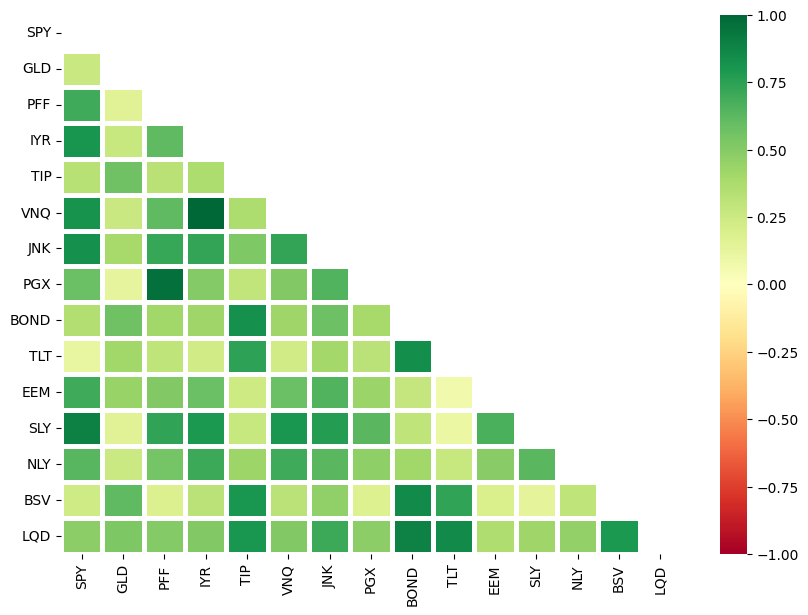

In [6]:
TRADING_DAYS_PER_YEAR, _, _ = pf.get_trading_days()
corr_df = portfolio.correlation_map(ts, method='log', days=TRADING_DAYS_PER_YEAR)
corr_df